# 모델 훈련
지금까지는 머신러닝 모델과 훈련 알고리즘을 fit으로 툭하고 끝냈다.
마치 불가해한 블랙박스의 취급을 했지만, 이제는 본격적으로 이것에 대해 알아볼 시간이 왔다.
<br>
일단은 가장 간단한 모델 중 하나인 선형 회귀부터 시작한다.<br>
이 모델을 훈련시키는 두 가지 방법을 설명하겠다.<br>
그 다음에는 비선형 데이터셋에 훈련시킬 수 있는 조금 더 복잡한 모델인 다항 회귀를 살펴보겠다.<br>
이 모델은 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉽다.<br>
따라서 학습 곡선을 사용해 모델이 과대적합되는지 감지하는 방법도 살펴보겠다.<br>
그런 다음 훈련 세트의 과대적합을 감소시킬 수 있는 규제 기법을 몇 가지 알아보겠다.<br>
마지막으로 분류 작업에 널리 사용하는 모델인 로지스틱 회귀와 소프트맥스 회귀를 살펴보겠다.<br>

### 설정

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 선형회귀
1장에서 본 만족도에 대한 간단한 선형 회귀 모델을 기억하는가?<br>
삶의 만족도 = b+w1*1인당GDP<br>
b(=w0)<br>
이렇게 일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(bias)라는 상수를 더해 예측을 만든다.<br>
<br>
이를 벡터 형태로 나타내면 더 쉽게 표현 가능하다.<br>
y = W*X<br>
이때 W는 편향 w0와 w1에서 wn까지의 특성 가중치를 담은 모델의 파라미터 벡터이다.<br>
X는 x0에서 xn까지를 담은 샘플의 특성 벡터이다. x0는 bias 담당이라 항상 1이다.<br>
내적이기 때문에 각 벡터의 동일 인덱스 위치를 곱해서 나타낸다.<br>
이를 함수 h(x)로 나타낼 수 있는데 이를 가설 함수 (hypothesis function)라고 부른다.<br>


이게 선형 회귀 모델이다. 이걸 훈련시키려면 어떻게 해야 할까?
애초에 훈련이라고 하는 건 모델이 훈련 세트에 가장 잘 맞도록 최적의 파라미터를 결정하는 것이다.<br>
이를 위해 모델이 훈련 데이터에 얼마나 잘 맞는지 즉 비용함수를 설정해야 한다.<br>
주로 많이 사용하는 것이 2장에서 언급한 RMSE이다. 실제로는 MSE를 더 많이 사용한다.<br>
## 정규 방정식
비용 함수를 최소화하는 w값을 찾기 위한 해석적인 방법이 존재한다. <br>
다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식이 있다.
이를 정규방정식이라고 한다.<br>
이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성하겠다.

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

그럼 이제 정규방정식을 사용해 비용함수를 최소화하는 w값을 계산해보겠다. 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를
사용해 역행렬을 계산하고 dot() 메서드를 사용해 행렬 곱셈을 하겠다.

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1 을 추가한다. 그럼 2열이 되겠지? 100 x 2
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 함수는 y=4+3x1+가우시안_노이즈 이다. 정규방정식으로 계산한 값을 확인해보겠다.

In [8]:
theta_best

array([[4.23837374],
       [2.74219447]])

w0 = 4.238와 w1 = 2.742 대신 w0 = 4 와 w1 = 3을 기대했다. 매우 비슷하긴 하지만 노이즈 때문에 원래 함수의 파라미터를 정확하게 재현하기 못했다. 
여기서 구한 비용함수를 최소화하는 w값으로 prediction을 수행해보자.

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #모든 샘플에 x0=1을 추가한다.
y_predict = X_new_b.dot(theta_best) # 위에서 구한 theta best 행렬을 내적하여 predict를 구함
y_predict

array([[4.23837374],
       [9.72276269]])

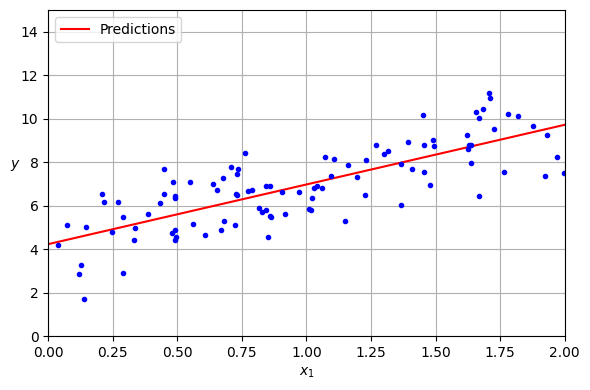

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

사이킷런에서 선형 회귀를 수행하는 것은 간단하다.

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.23837374]), array([[2.74219447]]))

In [13]:
lin_reg.predict(X_new)

array([[4.23837374],
       [9.72276269]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수 [least square에서 이름을 따옴] 를 기반으로 한다.
이 함수도 직접 호출할 수 있다.

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.23837374],
       [2.74219447]])

이 함수는 
유사역행렬(pseudoinverse)과 y를 내적하여 최적의 w값을 계산한다. 
np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.23837374],
       [2.74219447]])

유사역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다.
SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 U, E, V로 분해한다.
유사역행렬을 이용하는 이유는 이 방식이 훨씬 효율적인 것도 있지만 극단적인 값을 구할 수 있기 때문이다.
예를 들어서 m<n이거나(행,열 비대칭) 어떤 Feature가 중복되어 행렬 X^T * X 의 역행렬이 없다면(즉 특이 행렬이라면) 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다(그래서 유사!가 붙는다)

## 계산 복잡도
정규방정식은 X^T * X를 포함한 식을 계산한다. 해당 식의 역행렬을 계산하는 계산복잡도는 구현 방식에 따라 차이가 있으나, 일반적으로 O(n^2.4)~O(n^3)사이이다.
다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 2^2.4=5.3에서 2^3=8배로 증가한다.
사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2)이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

다행히 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠르다.
예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다.
다시 말해 예측하려는 샘플이 두 배로 늘어나면 걸리는 시간도 거의 두 배 증가한다는 것이다.

이제 완전히 다른 방식으로 선형 회귀 모델을 훈련시켜보겠다. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 전부
담을 수 없을 때 적합하다.

## 경사하강법
경사하강법(gradient descent)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
경사 하강법의 기본 아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 업데이트 하는 것이다.
w를 임의의 값으로 시작해서(random initialization) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.
경사하강법에서 중요한 파라미터는 나아가는 발자국, 즉 스템의 크기로 이는 학습률 파라미터로 결정된다.
학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.
반면 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라갈수도 있다.
이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다.
앞에서 배운 비용함수 중 하나인 MSE는 다행히 볼록 함수라서 중간에 local minimum에 도달할 일은 없다.

여기서의 비용함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양이 되기도 한다.
당연히 한쪽의 스케일이 크다면 완전히 스케일이 같아 원을 이룬 케이스보다 굽어서 최적의 값에 도달하기 떄문에
시간이 더 오래 걸릴 것이다. 

## 배치 경사 하강법
경사 하강법을 구현하려면 각 모델 파라미터 w_j에 대해 비용 함수의 그레디언트를 계산해야한다. 다시 말해 w_j가 조금 변경될 때 
비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수라고 한다. 

In [17]:
eta = 0.1 # 학습률 알파
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.23837374],
       [2.74219447]])

보면 정규방정식으로 찾은 매개변수의 최적의 값과 정확히 일치하는 것을 알 수 있다!
경사하강법이 정상적으로 그리고 완벽하게 동작한것이다.
그렇다면 적절한 학습률을 찾으려면 어떻게 해야할까?
바로 2장에서 배운 그리드 탐색을 사용한다.
하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

반복 횟수는 어떻게 지정해야 할까?
너무 작으면 최적접에 도달하기 전에 알고리즘이 멈춘다.
너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다.
간단한 방법은 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터의 크기가 어떤 허용오차보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

## 확률적 경사 하강법(SGD)
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 사실이다.
훈련 세트가 커지면 매우 느려지게 된다.
이와는 정반대인 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다.
매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 빠르다.
또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다.

반면 확률적(즉, 무작위로 선택하기 때문에)이므로 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다.
비용함수가 최솟값에 도달할 때까지 부드럽게 감소하지 않고, 위 아래로 요동치며 감소한다.
물론 시간이 지나면 최솟값에 매우 근접하겠지만, 요동이 지속되면서 최솟값에 안착하지는 못할 것이다.
알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 그것이 최적치는 아닐 것이다.

물론 비용함수가 굉장히 복잡하고 여러 능선이 있을 때 확률적 경사 하강법은 local minimum을 건너뛰도록 도와주기 때문에 
확률적 경사 하강법이 배치 경사 하강법보다 global minimum을 찾을 가능성이 높다.

이처럼 무작위성은 local minimum에서 탈출시켜줘서 좋지만 알고리즘을 global minimum에 다다르지 못하게 한다는 점에서 좋지
않다. 이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때 학습률을 크게 하고
점차 작게 줄여서 알고리즘이 global minimum에 도달할 수 있게 한다.

매 반복에서 학습률을 결정하는 함수를 학습 스케쥴(learning schedule)이라고 부른다.
학습률이 너무 빨리 줄어들면 local minimum에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있다.
학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 local minimum에 머무를 수 있다.
다음은 간단한 학습 스케쥴을 사용한 확률적 경사 하강법의 구현이다.

In [19]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t): # learning schedule
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 파라미터 무작위 초기화 값 지정

#m은 훈련세트의 샘플 수이다.
for epoch in range(n_epochs):
    for i in range(m): # 훈련세트 샘플 돌면서
        random_index = np.random.randint(m) # 무작위 인덱스 구하고
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #MSE 편미분 식에 대입
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        

일반적으로 한 반복에서 m번 되풀이 되고, 이때 각 반복을 epoch하고 한다.
배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 
매우 좋은 값에 도달한다.

In [20]:
theta

array([[4.18971426],
       [2.83301102]])

샘플을 무작위로 선택하기 떄문에 어떤 샘플은 한 epoch에서 여러 번 선택될 수 있고
어떤 샘플은 전혀 선택되지 못할 수도 있다.
알고리즘이 epoch마다 모든 샘플을 사용하게 하려면 
훈련 세트를 섞은 후 (입력 feature와 레이블을 동일하게 섞음) 차례대로 하나씩 선택하고
다음 epoch에서 다시 섞는 식의 방법을 사용할 수 있다.
그러나 당연히 이렇게 하면 더 늦게 수렴한다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본적으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용한다.
다음 코드는 최대 1000번 epoch 동안 실행된다. (max_iter = 1000)
또는 한 epoch에서 0.001보다 적게 손실이 줄어들 때까지 실행된다. (tol=1e-3)
학습률 0.1 (eta0 = 0.1)로 기본 학습 스케줄을 사용한다. 
* SGDRegressor에서 학습 스케쥴을 의미하는 매개변수 learning_rate의 기본값은 invscaling으로
eta0 / t ^ power_t 로 계산되지만 SGDClassifier의 learning_rate의 기본값은 optimal로 
1 / alpha(t0 + t) 이렇게 계산한다.

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21073011]), array([2.75593653]))

여기서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻을 수 있다.

## 미니배치 경사 하강법
마지막으로 볼 경사 하강법은 미니배치 경사 하강법이다. 배치와 확률적 경사 하강법을 알고 있다면 이해하기 쉬울 것이다.
각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레디언트를 계산하는 것이 아니라, 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산한다.
확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 
특히 GPU를 사용해서 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.
결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.
하지만 local minimum에서 빠져나오기는 더 힘들지도 모른다.
하지만 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케쥴을 사용하면 최솟값에 도달할 수 있다는 것을 잊지 말아야 한다.


## 다항 회귀
갖고 있는 데이터가 단순한 직선보다 복잡한 형태라면 어떻게 할까?
무조건 선형을 사용하지는 못한다!-가 아니라 무척이나 신기하게도 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다.
이런 기법을 다항 회귀 (polynomial regression)라고 한다.
이렇게 하는 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 
이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.
이런 기법을 다항 회귀(polynomial regression)라고 한다.

예를 들어서 다음과 같은 간단한 2차 방정식으로 비선형 데이터를 생성하겠다. (이때 약간의 노이즈도 포함한다)

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

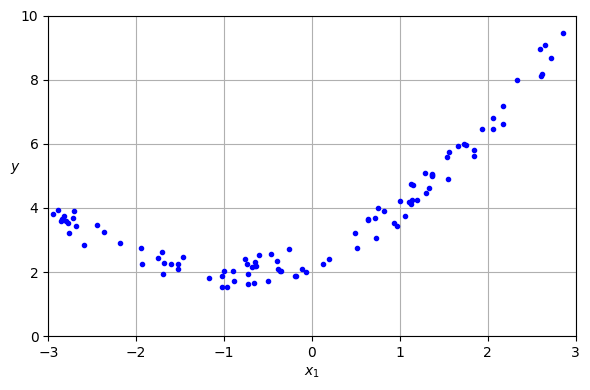

In [28]:
# 추가 코드 - 이 셀은 그림 4-12를 생성하고 저장합니다.
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

확실히 직전은 이 데이터에 잘 맞지 않을 것이다. 그러므로 사이킷런의 PolynomialFeatures를 사용해 
훈련 데이터를 변환해보겠다. 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.85551916])

In [31]:
X_poly[0]

array([-2.85551916,  8.15398968])

X_poly는 이제 원래 feature X와 이 Feature의 제곱을 포함한다.
이 확장된 훈련 데이터에 Linear Regression을 적용해보겠다.

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.48077615]), array([[1.00611256, 0.50993996]]))

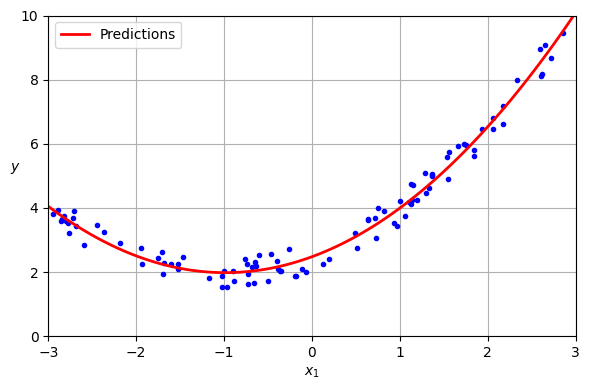

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

나쁘지 않게 나온다. 실제 원래 함수가 y = "$0.5x^2+1.0x+2.0+가우시안_노이즈$" 이고 예측된 모델은 
y = "$0.56x^2+0.93x+1.784$"이다. feature가 여러 개일 때 다항 회귀는 이 feature 사이의 관계를 찾을 수 있다.
(이는 일반적인 선형 회귀 모델에서는 하지 못한다.)
PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.
예를 들어 두 개의 feature a,b가 있을 때 degree=3으로 PolynomialFeatures를 적용하면 a^2, a^3, b^2, b^3 
뿐만 아니라 ab, a^2b, ab^2도 특성으로 추가한다.

## 학습 곡선
고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
하지만 그런만큼 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과적합되기 쉽다.
반면에 이런 데이터에 일반적인 선형 모델을 사용하면 이건 과소적합일 것이다.
결국 (2차 방정식으로 생성한 데이터이기 때문에 당연히...) 가장 일반화가 잘 될 모델은 2차 다항 회귀이다.
그러면 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까?
어떻게 모델이 데이터에 과적합 또는 과소적합되었는지 알 수 있을까?

우리는 2장에서 모댈의 일반화 성능을 추정하기 위해 교차 검증을 수행했다.
훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과적합된 것이다.
만약 양쪽에 모두 좋지 않으면 과소적합이다.
이런 경우 모델이 너무 단순하거나 너무 복잡하다고 말한다.

이런 교차검증 말고도 또 다른 방법이 있다. 바로 학습 곡선(learning curve)을 살펴보는 것이다.
이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.
이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.
다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # 훈련 세트 길이만큼
        model.fit(X_train[:m], y_train[:m]) # 점점 크기 늘려가며 학습
        y_train_predict = model.predict(X_train[:m]) # 훈련 데이터 세트 prediction
        y_val_predict = model.predict(X_val) # 테스트 데이터 세트 예측
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #MSE로 실제 라벨과 오차
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

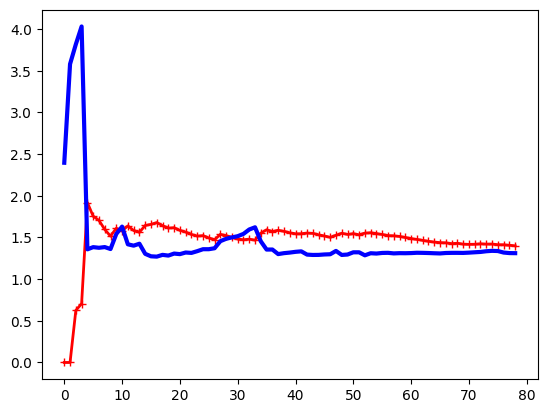

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

위는 단순 선형 회귀 모델의 학습 곡선이다.
과소적합된 이 모델은 훈련 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 때 모델이 완벽하게 동작한다.
하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해진다.
그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다.
해당 평평한 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다.
그럼 이제 검증 데이터에 대한 모델의 성능을 보겠다.
모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 크다.
모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.
하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.

이제 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려보겠다.

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

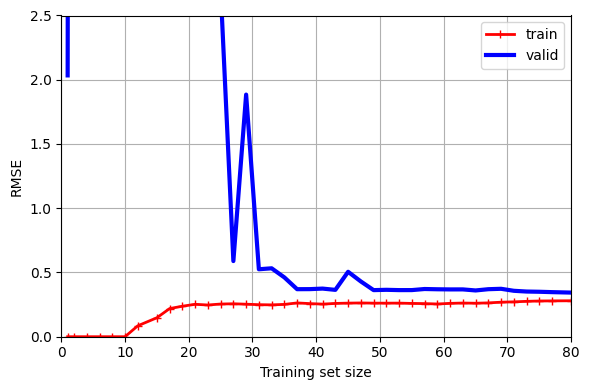

In [42]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있다.
* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
* 두 곡선 사이에 공간이 있다. 즉 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 낫다(better)는 것이다. 이는 과대적합 모델의 특징이다. 여기서 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다. 이와 같이 과대적합 모델을 개선하는 하나의 방법은 검증오차가 훈련 오차에 근접해질때까지 더 많은 훈련 데이터를 추가하는 것이다.

## 규제가 있는 선형 모델 
1장과 2장에서 나왔듯이 과대적합을 해소하는 좋은 방법은 모델을 규제하는 것이다. 
자유도를 줄이면 데이터에 과대적합되기 더 어려워진다.
다항 회귀 모델에서 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.
각기 다른 방법으로 가중치를 제한하는 '릿지' 회귀, '라쏘' 회귀, 엘라스틱넷을 살펴보겠다.

## 릿지 회귀
릿지 회귀(= 티호노프 규제)는 규제가 추가된 선형 회귀 버전이다.
규제항이 따로 비용 함수에 추가된다. <br> α∑θ^2 <br>
이는 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다. 
규제항은 훈련하는 동안에만 비용 함수에 추가된다.
모델의 훈련이 끝나면 모델의 성능을 <b>규제가 없는 성능 지표</b>로 평가한다.
하이퍼파라미터 α는 모델을 얼마나 많이 규제할지 조절한다.
α=0이면 릿지 회귀는 선형 회귀와 같아진다.
α가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.
다음 식은 릿지 회귀의 비용함수이다.
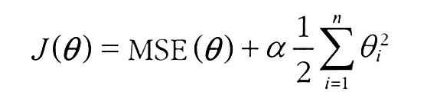 <br>
이때 bias 세타제로는 규제되지 않는다. w를 특성의 가중치 벡터라고 정의하면(세타1~세타n) 규제항은 1/2 * (|w|^2)과 같다.
경사 하강법에 적용하려면 MSE 그레이디언트 벡터에 aW를 더하면 된다.
* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. 이는 규제가 있는 모델이면 대부분 마찬가지이다.

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사하강법을 사용할 수도 있다.
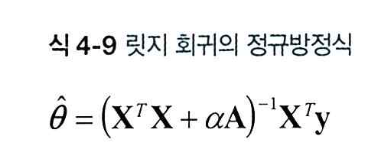 <br>
다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다.

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.0784444]])

다음은 확률적 경사 하강법을 사용했을 때이다.

In [45]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # fit()은 1D 타겟을 기대하므로 y.ravel()을 사용합니다.
sgd_reg.predict([[1.5]])

array([5.08484562])

이때 penalty 매개변수는 사용할 규제를 지정한다. "l2"는 SGD가 비용 함수에 가중치 벡터의 l-2 norm의 제곱을 2로 나눈
규제항을 추가하게 만든다. 즉 릿지 회귀와 같다!

## 라쏘 회귀
라쏘 회귀 (Lasso)는 선형 회귀의 또 다른 규제된 버전이다.
릿지 회귀처럼 비용 함수에 규제항을 더하지만 L-2 노름의 제곱을 2로 나눈 것 대신 
가중치 벡터의 L-1 노름을 사용한다.
<b<라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점이다.</b>
다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만든다.
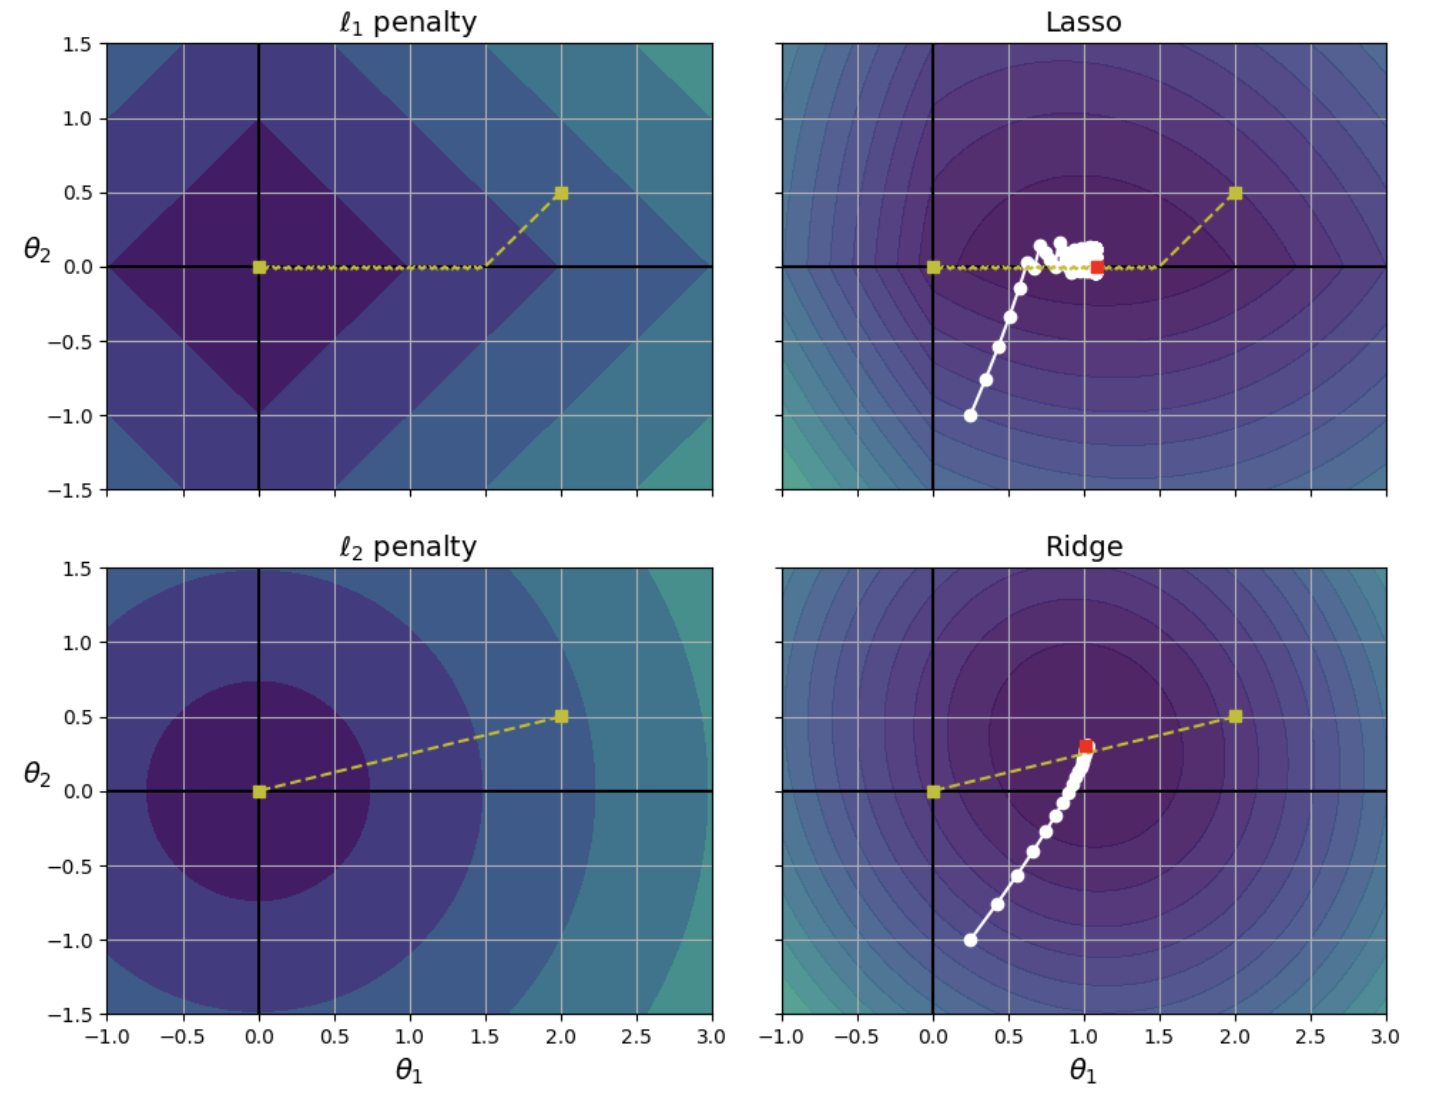 <br>
위의 그림을 보고 쉽게 이해할 수 있다.
두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 다른 손실 함수를 나타낸다.
왼쪽 위 그래프의 등고선은 L-1손실을 나타낸다. 축에 가까워지면서 선형적으로 줄어든다.
예를 들어 모델 파라미터를 각각 2와 0.5로 초기화하고, 경사 하강법을 실행하면 두 파라미터가 동일하게 감소될 것이다.
따라서 θ2가 먼저 0에 도달한다. 그 다음 경사 하강법이 θ1=0에 도달할 때까지 축을 따라 내려갔다.
오른쪽 위 그래프의 등고선은 라쏘 손실 함수를 나타낸다. 하얀 작은 원이 경사 하강법이 θ1=0.25, θ2= -1로 초기화된 모델 파라미터를 최적화하는 과정을 보여준다. 여기에서도 θ2=0으로 빠르게 줄어들고 그 다음 축을 따라 진동하면서 전역 최적점에 도달한다.
알파가 증가하면 전역 최적접이 노란 점선을 따라 왼쪽으로 이동한다. 알파가 감소하면 전역 최적점이 오른쪽으로 이동한다.
아래 두 개의 그래프도 동일하지만 L-2 페널티를 사용한다.
왼쪽 아래 그래프에서 L-2 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있다. 따라서 경사 하강법이 원점까지 직선 경로를 따라 간다. 오른쪽 아래 그래프의 등고선은 릿지 회귀의 비용 함수를 나타낸다. 라쏘와 다른 점은 두 가지이다. 첫째, 파라미터가 global minimum에 가까워질수록 gradient가 작아진다. 따라서 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다(즉 진동이 없다!
둘째 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0가 되지는 않는다.
라쏘의 비용 함수는 θ1=0에서 미분 가능하지 않는다.
하지만 θi=0일 때 서브그레이디언트 벡터 (subgradient vector) g를 사용하면 경사 하강법을 적용하는데 문제가 없다.
다음은 Lasso 클래스를 사용한 간단한 사이킷런 예제이다.

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.02513864])

## 엘라스틱넷
엘라스틱넷(elastic net)은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.
규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다.
r=0이면 엘라스틱넷은 릿지 회귀와 같고 r=1이면 라쏘 회귀와 같다.
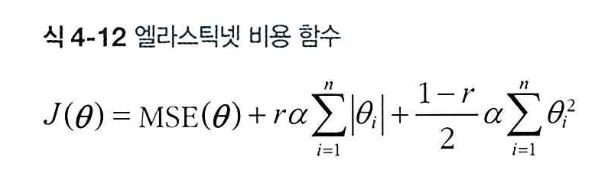 <br>
그럼 보통의 선형 회귀 (규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까...
적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적인 평범한 선형 회귀는 피해야 한다.
릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
이 모델들은 앞에서 말햇듯이 불필요한 특성의 가중치를 0으로 만든다.
특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 
보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.
다음은 ElasticNet을 사용한 간단한 예제이다.

In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.03174011])

## 조기 종료
경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 
검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 것이다.
이를 <b>조기 종료</b>라고 한다.
배치 경사 하강법으로 훈련시킨 복잡한 모델을 보여준다. (고차원 다항 회귀 모델이다!)
epoch이 진행됨에 따라 알고리즘이 점차 학습되어 
훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어든다.
그러나 잠시 후 감소하던 검증 에러가 멈췄다가 다시 상승한다.
모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다.
조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다. 

## 로지스틱 회귀
1장에서도 이야기한 것처럼, 어떤 회귀 알고리즘은 분류에서도 사용할 수 있다.
로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용한다.
추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 에측한다.
아니면 클래스에 속하지 않는다고 예측한다.
이를 이진 분류기라고 한다.

### 확률 추정
그렇다면 로지스틱 회귀는 실제 어떻게 작동하는 걸까? 선형 회귀 모델과 같이 로지스틱 회귀 모델은 
입력 특성의 가중치 합을 계산한다.
대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력한다.
로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.
로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률을 추정하면 이에 대한 예측 y를 쉽게 구할 수 있다.

### 훈련과 비용 함수
이제 로지스틱 회귀 모델이 어떻게 확률을 추정하고 예측하는지 알았다.
그럼 어떻게 훈련시킬까?
훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해선 낮은 확률을 추정하는 모델의
파라미터 벡터 세타를 찾는 것이다.
이러한 아이디어가 하나의 훈련 샘플 x에 대해 나타낸 비용 함수인 다음 식에 드러나 있다.
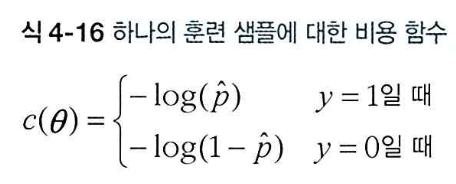
이 비용 함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다 할 수 있다.
그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것이다.
로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용하겠다.
이 데이터셋은 세 개의 품종 Iris-Setosa, Iris-Versicolor, Iris-Virginica에 속하는 붓꽃 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있다.
꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보겠다.

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(np.int64)

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

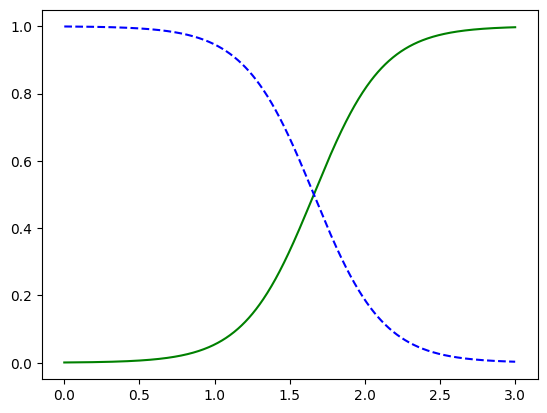

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

## 소프트맥스 회귀
로지스틱 회귀 모델은 3장에서 보았던 것 처럼 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록
일반화될 수 있다. 이를 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 한다.
개념은 매우 간단하다. 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다.
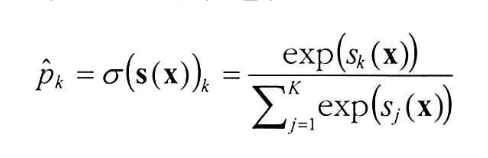
로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택한다.
모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 궁극적인 목적이다. 크로스 엔트로피 (cross entropy) 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다.
크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용된다.
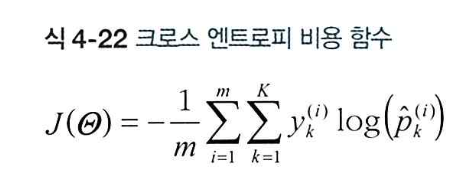
딱 두 개의 클래스가 있을 때 (K=2) 이 비용 함수는 로지스틱 회귀의 비용 함수와 같다.
이 비용 함수의 그레디언트 벡터를 구해서 비용 함수를 최소화하기 위한 파라미터 행렬을 찾기 위해 경사 하강법을 사용할 수 있다.
소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보겠다.
사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다 전략을 사용한다.
하지만 multi_class 매개변수를 multinomial로 바구면 소프트맥스 회귀를 사용할 수 있다.
소프트맥스 회귀를 사용하려면 solver 매개변수에 lbfgs와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다.
또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 L-2 규제가 적용된다.

In [55]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])